In [1]:
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [3]:
import numpy as np

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [5]:
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
from keras.models import Sequential
model = Sequential()

In [8]:
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

In [9]:
model.add(Conv2D(64,(3,3) ,input_shape = (28,28,1),activation = "relu"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(10 , activation = "softmax"))

In [11]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [26]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=2,
                    validation_split=0.1
                    )

Epoch 1/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9927 - val_loss: 0.0230
Epoch 2/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9928 - val_loss: 0.0267


In [29]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [31]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

print("Confusion Matrix:")
cf = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cf)

Accuracy: 0.9893
Confusion Matrix:
[[ 974    0    1    0    0    0    3    0    1    1]
 [   0 1128    0    0    1    1    4    1    0    0]
 [   1    1 1022    0    0    0    0    8    0    0]
 [   0    0    3  998    0    6    0    0    2    1]
 [   0    0    0    0  974    0    3    0    0    5]
 [   1    0    0    2    0  886    3    0    0    0]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    0    6    1    0    1    0 1011    1    8]
 [   6    0    4    1    1    3    4    2  947    6]
 [   0    0    0    0    5    4    0    0    0 1000]]


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

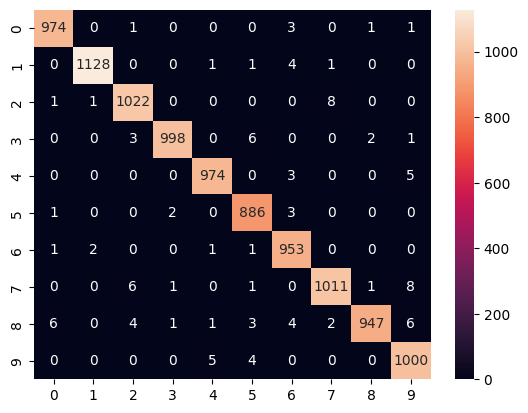

In [33]:
sns.heatmap(cf,annot=True,fmt="d")
plt.show()